# Activity Recognition

This project is based on recognising the activities of human like laying, sitting, standing, walking, walking upstairs and walking downstairs.
This projects uses UCI HAR Dataset that was carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

#1. Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as grpobj
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

#2. Data Preparation & Analysis

In this dataset there are inertial features,subjects and inertial data for test and train case. Data is in text format.
So we need to attach features with the respective inertial data as well as subject details and target variable i.e. activity.

In [ ]:
'''listing features'''
features=list()
with open('/content/drive/MyDrive/UCI HAR Dataset/features.txt') as f:
  features=[line.split()[1] for line in f.readlines()]
print(len(features))

561


In [ ]:
'''Reading train inertial data and attaching with features and add subject column'''
x_train=pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt",delim_whitespace=True,header=None)
x_train.columns=[features]
x_train['subject']=pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/subject_train.txt",header=None)
x_train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1


In [ ]:
'''Reading target dataset and map with respective name of the activity'''
y_train=pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt",names=['Activity'],squeeze=True)
y_train_labels=y_train.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})
y_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: Activity, Length: 7352, dtype: int64

In [ ]:
'''Prepare train dataset that include inertial sensor data, subjects and activity with its name'''
train=x_train
train['Activity']=y_train
train['ActivityName']=y_train_labels
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [ ]:
train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,2,WALKING_UPSTAIRS


In [ ]:
'''Shape of train dataset'''
train.shape

(7352, 564)

In [ ]:
'''Similarly preparing test dataset'''
x_test=pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt',header=None,delim_whitespace=True)
x_test.columns=[features]
x_test['subject']=pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/subject_test.txt',header=None)
x_test.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2


In [ ]:
y_test=pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt',header=None,squeeze=True)
y_test_labels=y_test.map({1:'WALKING',2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING',5:'STANDING',6:'LAYING'})
y_test

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

In [ ]:
test=x_test
test['Activity']=y_test
test['ActivityName']=y_test_labels
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [ ]:
test.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,WALKING_UPSTAIRS
2946,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,24,2,WALKING_UPSTAIRS


In [ ]:
'''Shape of test dataset'''
test.shape

(2947, 564)

In [ ]:
'''checking any duplicated value in train and test'''
sum(train.duplicated())

0

In [ ]:
sum(test.duplicated())

0

In [ ]:
'''Checking any null value in train and test dataset'''
train.isnull().values.sum()

0

In [ ]:
test.isnull().values.sum()

0

In [ ]:
'''Save the data in csv file for further usage'''
train.to_csv('/content/drive/MyDrive/UCI HAR Dataset/train/train.csv',index=False)
test.to_csv('/content/drive/MyDrive/UCI HAR Dataset/test/test.csv',index=False)

#3. Data Extraction

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/train/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/UCI HAR Dataset/test/test.csv')
train_data.shape,test_data.shape


((7352, 564), (2947, 564))

#4. Data Preprocessing

In [ ]:
'''Features have some anomaly in their name that is coorected'''
columns=train_data.columns
columns=columns.str.replace('[()]','')
columns=columns.str.replace('[-]','')
columns=columns.str.replace('[,]','')
train_data.columns=columns
test_data.columns=columns
test_data.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

#5. Exploratory Data Analysis

#5a Subject Distribution

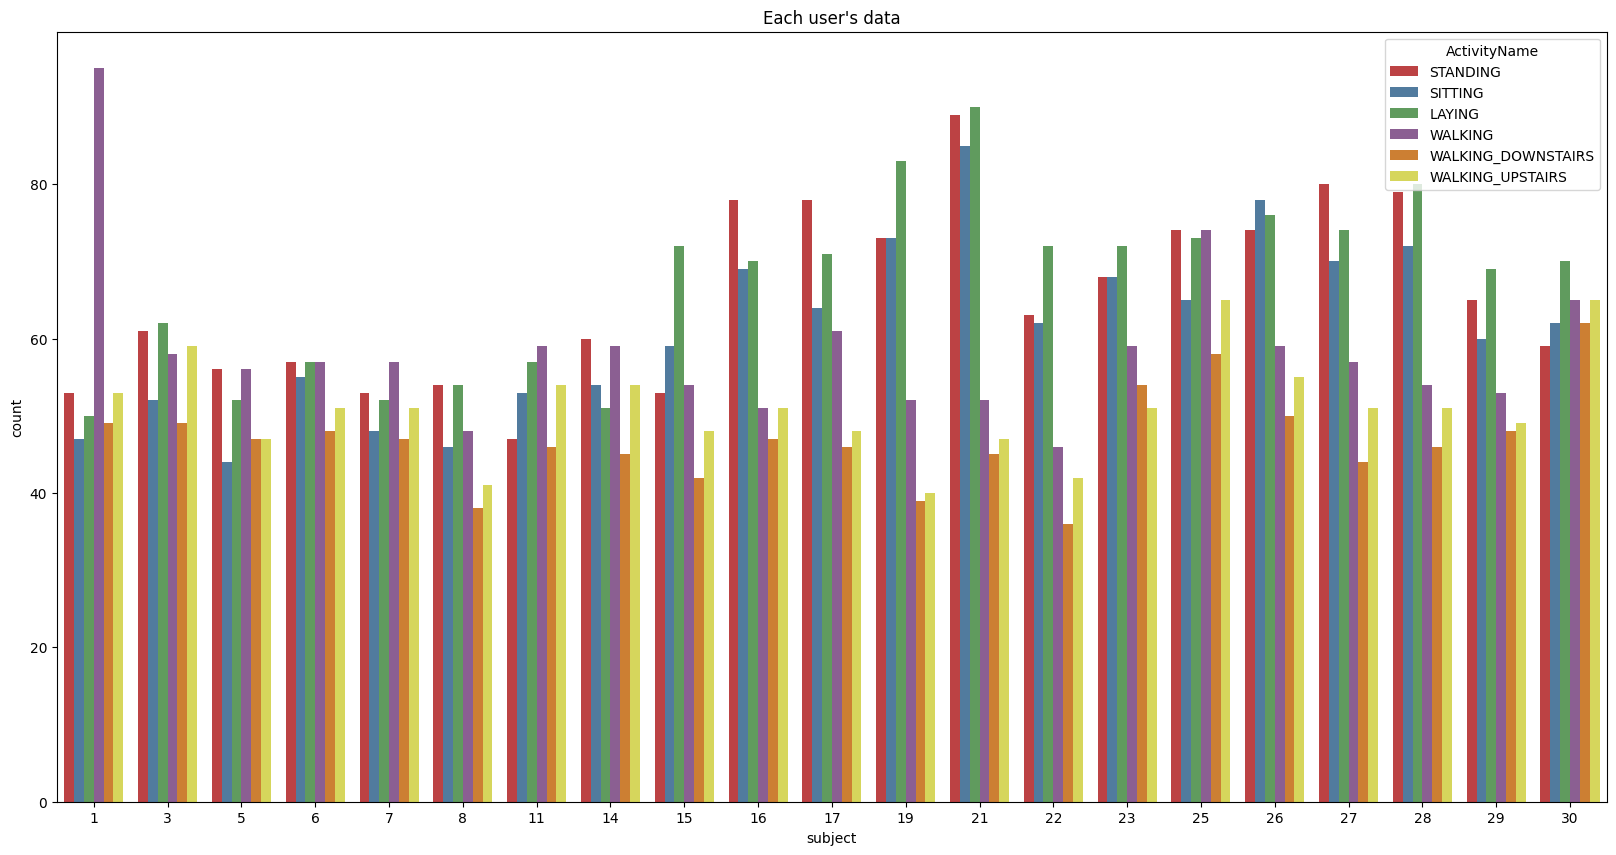

In [ ]:
'''Analysing each subject activity'''
plt.figure(figsize=(20,10))
plt.title("Each user's data")
sns.countplot(x='subject',hue='ActivityName',data=train_data)
plt.show()

Analysis of countplot:-
1. Standing, walking and laying are three more predominant activities.
2. Least predominant activity is walking downstairs.

Activity Distribution

In [ ]:
label_counts=train_data['ActivityName'].value_counts()
n=label_counts.shape[0]
colormap=plt.get_cmap('magma')
colors = [mt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = grpobj.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = grpobj.Layout(title = 'ActivityName Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = grpobj.Figure(data=[data], layout=layout)
fig.show()

#5b tBodyAccMagmean Distribution

tBodyAccMagmean is the feature that contains mean value of magnitude of acceleration.

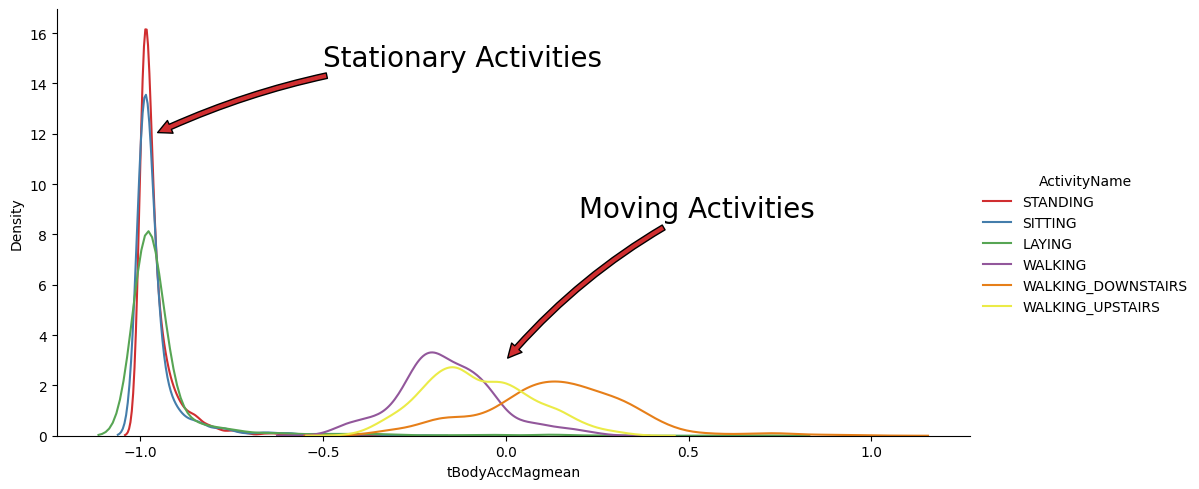

In [ ]:
sns.set_palette("Set1",desat=0.80)
facetgrid = sns.FacetGrid(train_data,hue='ActivityName',height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
             va='center', ha='left', arrowprops=dict(arrowstyle='simple',\
             connectionstyle="arc3, rad=0.1"))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
             va='center', ha='left', arrowprops=dict(arrowstyle='simple',\
             connectionstyle="arc3, rad=0.1"))
plt.show()

Distribution observations:-
1. Stationary activity has higher density when tBodyAccMagmean in range of -1.1 to -0.75 and became flat with tBodyAccMagmean increases from -0.5.
2. Most stationary activity have peak density around tBodyMagmean=-0.1
3. Highest density stationary activity is standing.
4. Moving activity is more predominant in range (-0.5,0.5) of tBodyAccMagmean.
5. Most predominant moving activity is walking.

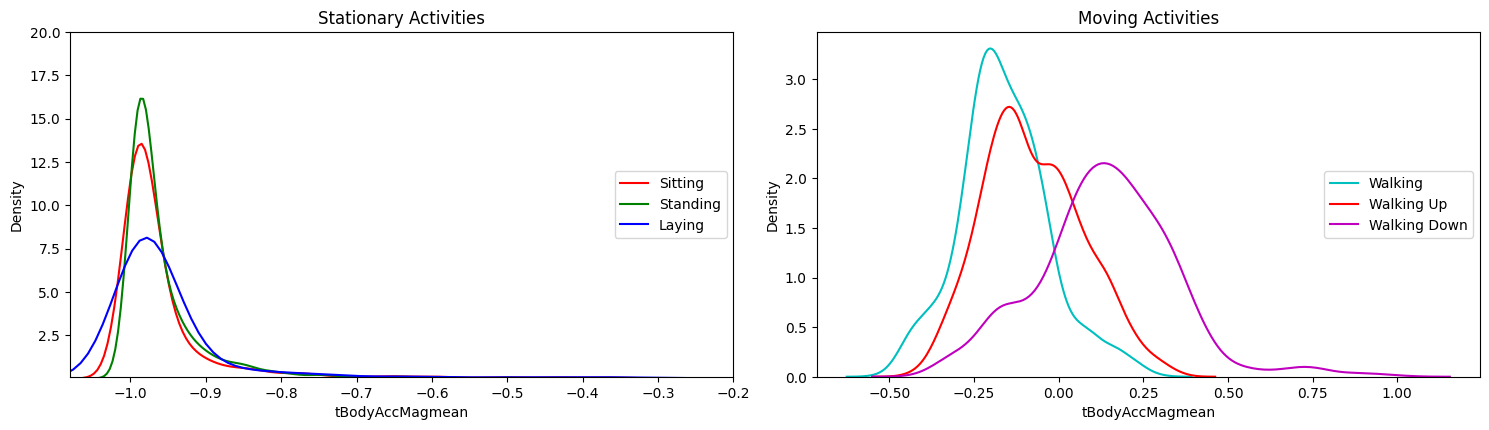

In [ ]:
'''Analyze each type of activity seperately'''
df1=train_data[train_data['Activity']==1]
df2=train_data[train_data['Activity']==2]
df3=train_data[train_data['Activity']==3]
df4=train_data[train_data['Activity']==4]
df5=train_data[train_data['Activity']==5]
df6=train_data[train_data['Activity']==6]

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('Stationary Activities')
sns.distplot(df4['tBodyAccMagmean'],color ='r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color='g',hist= False, label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color='b',hist=False,label='Laying')
plt.axis([-1.08,-0.2,0.1,20])
plt.legend(loc='right')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color='c',hist=False,label='Walking')
sns.distplot(df2['tBodyAccMagmean'],color='r',hist=False,label='Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color='m',hist=False,label='Walking Down')
plt.legend(loc='right')
plt.tight_layout()
plt.show()

#5c Seperating Acceleration magnitude based on activity'''

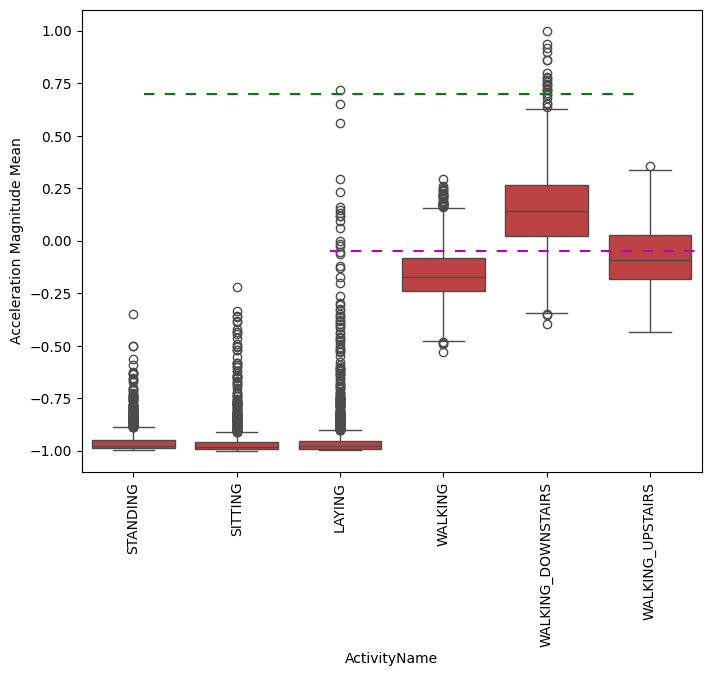

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean', data=train_data)
plt.ylabel('Acceleration Magnitude Mean')
plt.axhline(y=0.7, xmin=0.1, xmax=0.9, dashes=(5,5),c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5),c='m')
plt.xticks(rotation=90)
plt.show()

Observations:-

1.   If tBodyAccMagmean is < -0.8 then the Activities are either Standing or Sitting or Laying.
2.   If tBodyAccMagmean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
1.   If tBodyAccMagmean > 0.0 then the Activity is WalkingDownstairs.
2.   We can classify 75% the Acitivity labels with some errors













#5d Position of Gravity Component

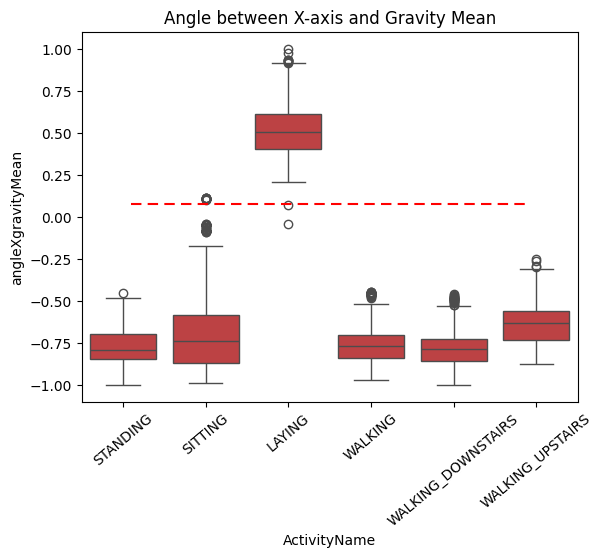

In [ ]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train_data)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, dashes=(5,3),c='r')
plt.title("Angle between X-axis and Gravity Mean")
plt.xticks(rotation=40)
plt.show()

Observations:-
If angleXgravityMean >0.0 then only activity is laying.

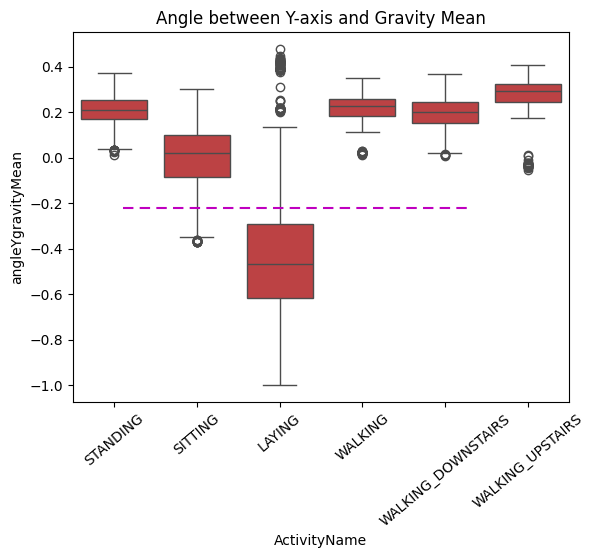

In [ ]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data=train_data)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3),c='m')
plt.title("Angle between Y-axis and Gravity Mean")
plt.xticks(rotation=40)
plt.show()

#5e Applying tsne

t-SNE, or t-distributed stochastic neighbor embedding, is a machine learning algorithm commonly used for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. It is particularly useful for visualizing complex, nonlinear relationships in the data.

Here's a brief overview of how t-SNE works:

Similarity Measurement: For each pair of high-dimensional data points, t-SNE computes a probability distribution that represents their similarity. This distribution is based on a Gaussian centered at each data point, with heavier tails compared to the normal Gaussian.

Dimension Reduction: Next, t-SNE tries to find a low-dimensional representation of the data, such as 2D or 3D, where the similarity between data points is preserved as much as possible. It minimizes the Kullback-Leibler divergence between the high-dimensional similarity distribution and the low-dimensional representation.

Optimization: t-SNE iteratively optimizes the low-dimensional representation to minimize the mismatch between the high-dimensional and low-dimensional similarity distributions. It uses gradient descent to find the optimal embedding.

t-SNE is commonly used for visualizing high-dimensional datasets, especially in areas such as natural language processing, image processing, and bioinformatics. It can reveal clusters, patterns, and relationships that might not be apparent in the original high-dimensional space.

Here we used t-SNE  to reduce the dimensionality of the data (X_data) to 2D, and then scatter plots are created to visualize the embeddings for different perplexity values, where each point is colored according to its label (y_data).

In [ ]:
def perform_tsne(x_data, y_data, perplexities, n_iter=100, img_name_prefix='t-sne'):
  for index,perplexity in enumerate(perplexities):

        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(x_data)
        print('Done..')


        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})


        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 100 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.017s...
[t-SNE] Computed neighbors for 7352 samples in 1.835s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.029s
[t-SNE] Iteration 50: error = 119.3297882, gradient norm = 0.0435778 (50 iterations in 3.772s)
[t-SNE] Iteration 100: error = 105.1423035, gradient norm = 0.0280103 (50 iterations in 3

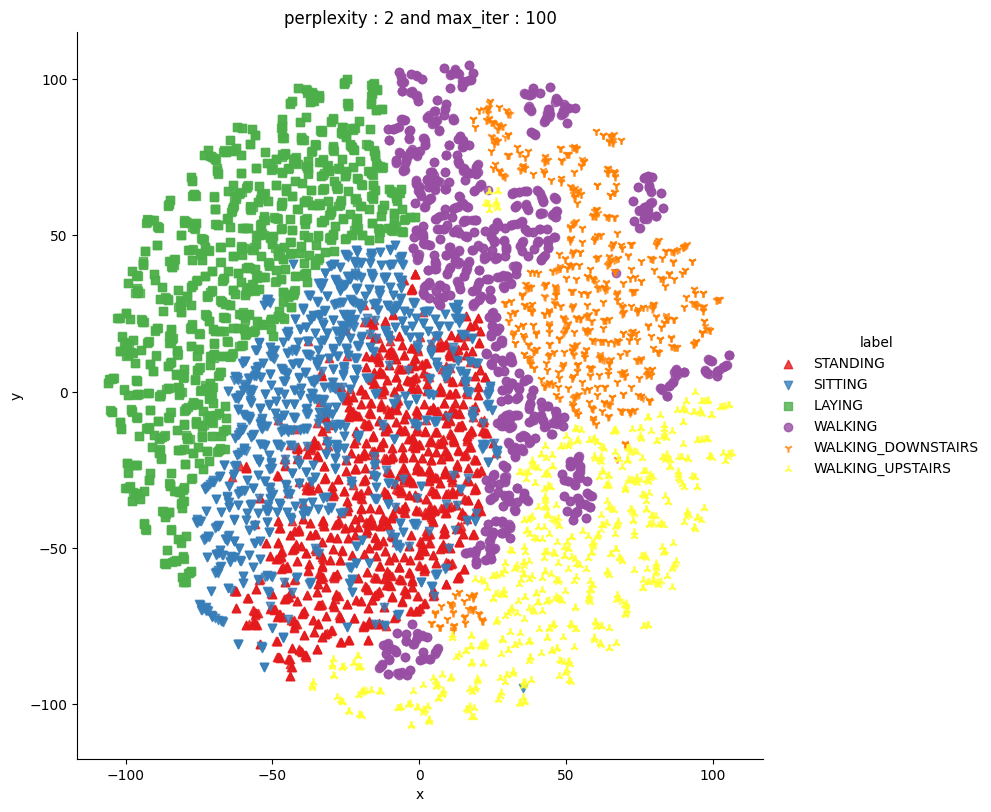

Done

performing tsne with perplexity 5 and with 100 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.018s...
[t-SNE] Computed neighbors for 7352 samples in 2.129s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.050s
[t-SNE] Iteration 50: error = 107.1663666, gradient norm = 0.0370964 (50 iterations in 6.001s)
[t-SNE] Iteration 100: error = 95.6689301, gradient norm = 0.0148966 (50 iterations

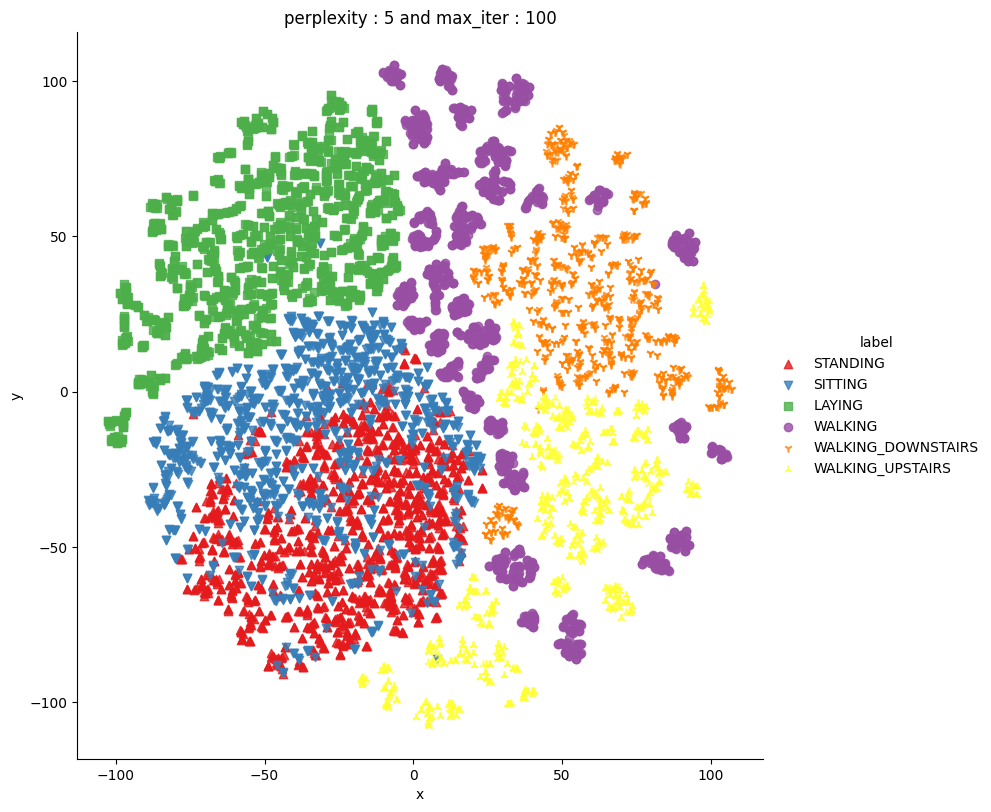

Done

performing tsne with perplexity 10 and with 100 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 1.874s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.060s
[t-SNE] Iteration 50: error = 97.8984375, gradient norm = 0.0369286 (50 iterations in 5.337s)
[t-SNE] Iteration 100: error = 88.9357834, gradient norm = 0.0102291 (50 iterations

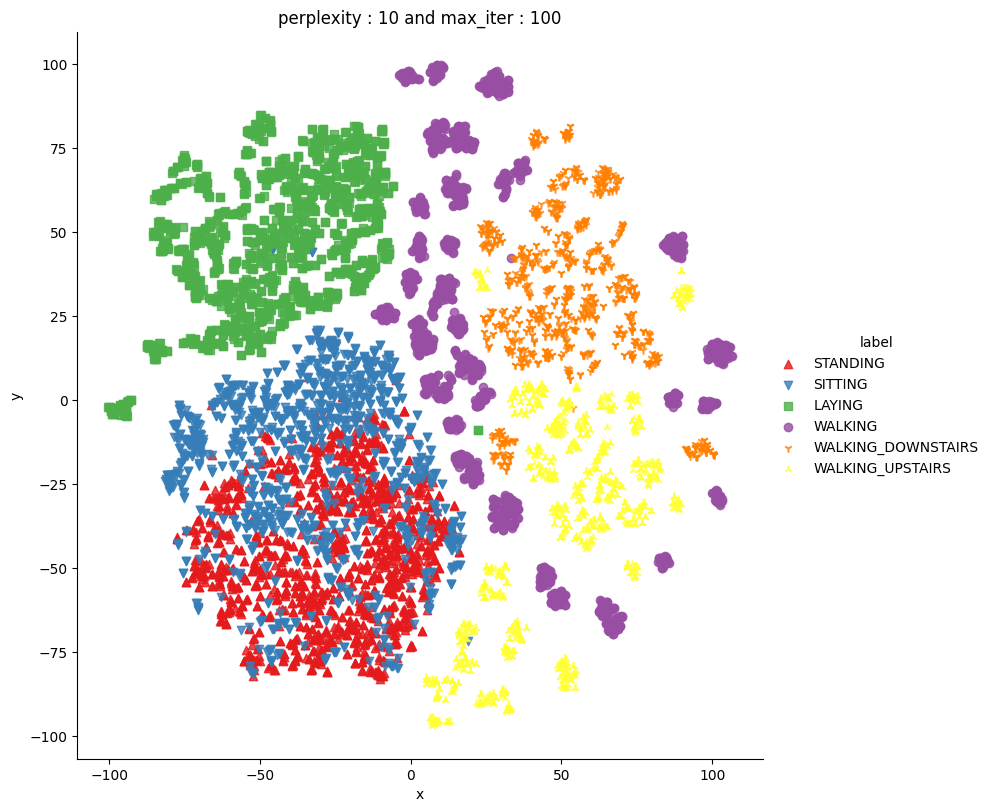

Done

performing tsne with perplexity 20 and with 100 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.015s...
[t-SNE] Computed neighbors for 7352 samples in 1.866s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.114s
[t-SNE] Iteration 50: error = 89.2985840, gradient norm = 0.0304157 (50 iterations in 5.163s)
[t-SNE] Iteration 100: error = 82.9675293, gradient norm = 0.0079223 (50 iterations

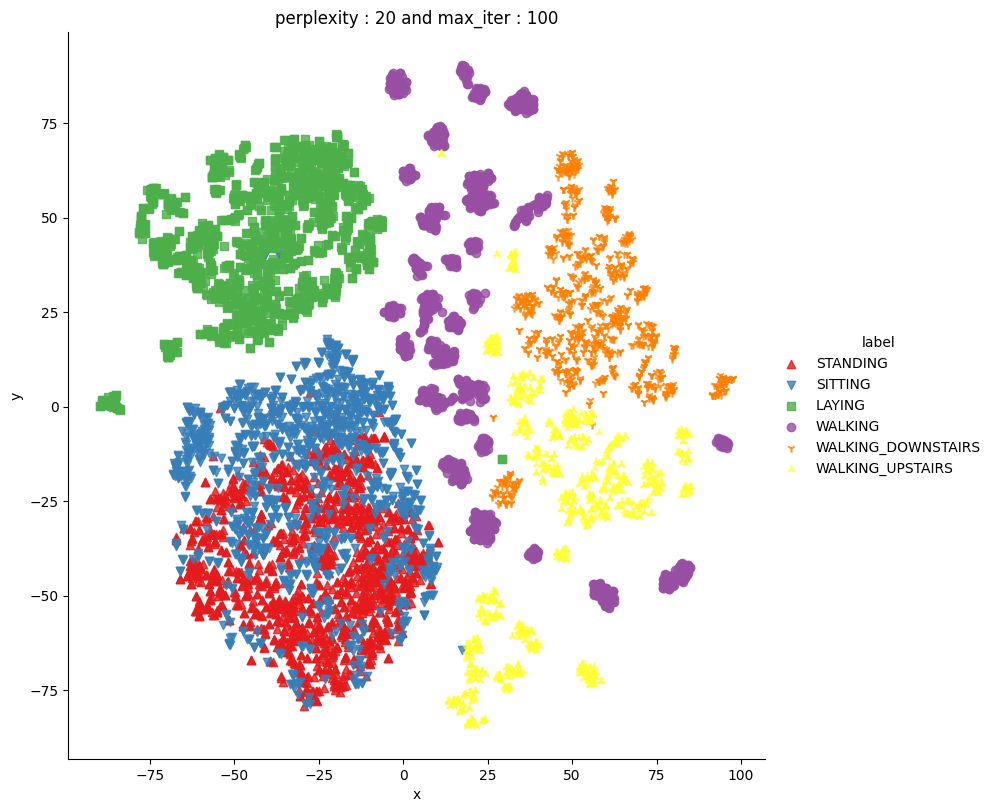

Done

performing tsne with perplexity 50 and with 100 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.015s...
[t-SNE] Computed neighbors for 7352 samples in 2.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.299s
[t-SNE] Iteration 50: error = 78.8809433, gradient norm = 0.0240344 (50 iterations in 8.276s)
[t-SNE] Iteration 100: error = 75.2882690, gradient norm = 0.0052696 (50 iteration

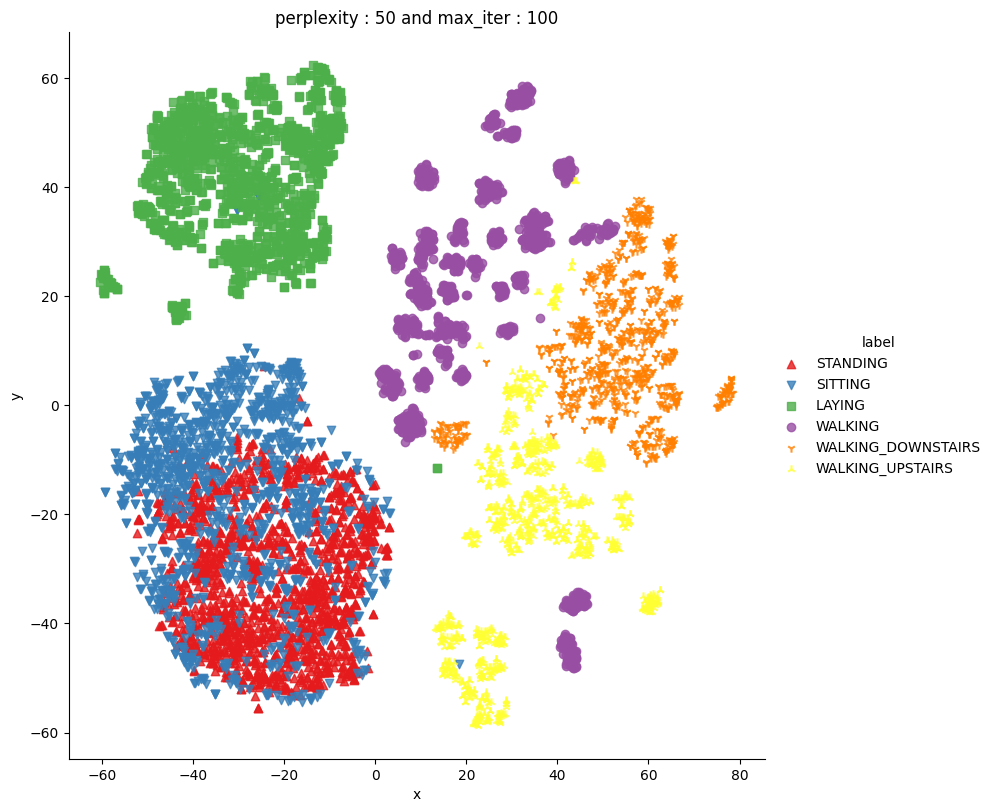

Done


In [ ]:
X_pre_tsne = train_data.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train_data['ActivityName']
perform_tsne(x_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

Observations:-
In this plot we observed all activities are seperated except sitting and standing.